<a href="https://colab.research.google.com/github/faridacoder/Breast-Cancer-XAI-Final/blob/main/XAI_Note_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
awsaf49_cbis_ddsm_breast_cancer_image_dataset_path = kagglehub.dataset_download('awsaf49/cbis-ddsm-breast-cancer-image-dataset')

print('Data source import complete.')


Data source import complete.


# Installations

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
#from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

In [3]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.167870347713399255540531403890903881251/2-145.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.167870347713399255540531403890903881251/1-144.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.124325172312570652216926793142454709735/1-116.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.157948882212719570920293305892444514849/1-062.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.157948882212719570920293305892444514849/2-169.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.428163832610892161130597449180121416361/1-231.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.36686540512594029331297737532659590420/1-257.jpg
/kaggle/input/cbis-ddsm-br

# Exploring Files & Data

In [4]:
dicom = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
image_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [5]:
dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [6]:
dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [7]:
cropped = dicom[dicom.SeriesDescription == 'cropped images'].image_path
cropped.head()

,image_path
0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...


In [8]:
cropped = cropped.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped.head()

,image_path
0,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
3,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
6,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
7,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
10,/kaggle/input/cbis-ddsm-breast-cancer-image-da...


# Printing some Image Samples

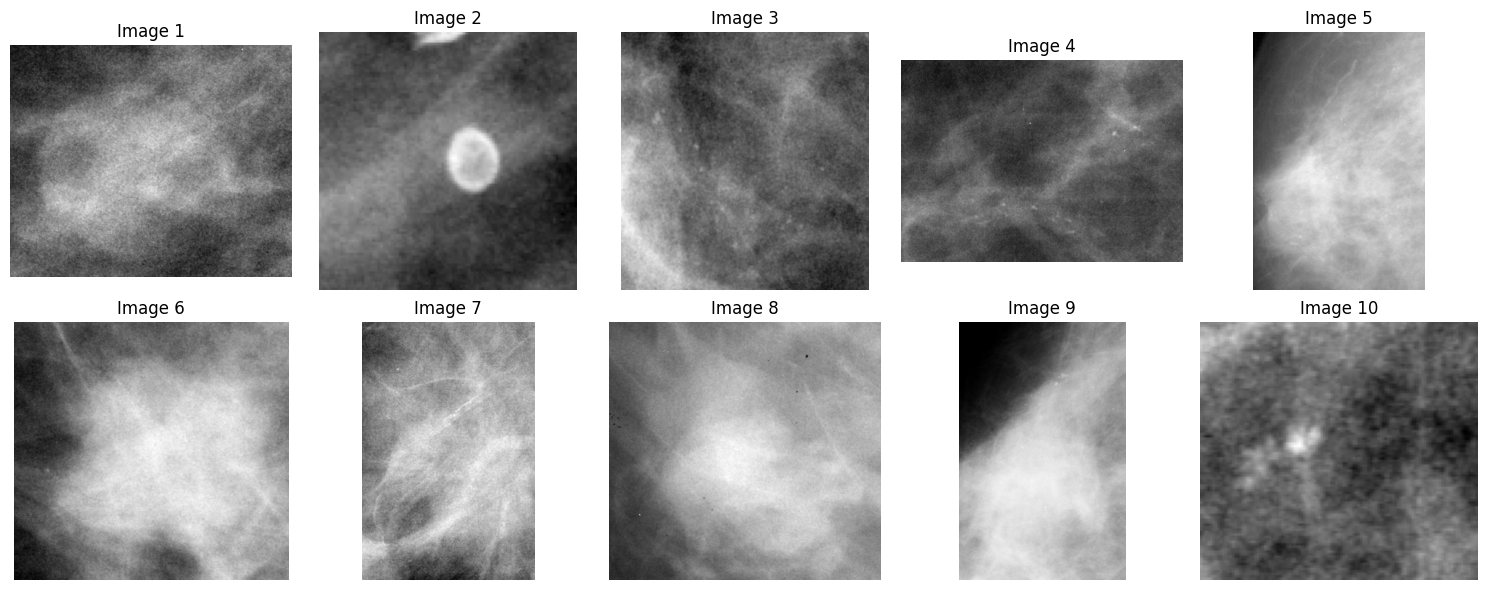

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns for 10 images

for i, file in enumerate(cropped[0:10]):
    img = Image.open(file).convert("L")
    row, col = divmod(i, 5)
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()


In [10]:
full_mammogram= dicom[dicom.SeriesDescription == 'full mammogram images'].image_path
full_mammogram.head()

,image_path
1,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...


In [11]:
full_mammogram = full_mammogram.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram.head()

,image_path
1,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
2,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
11,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
12,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
15,/kaggle/input/cbis-ddsm-breast-cancer-image-da...


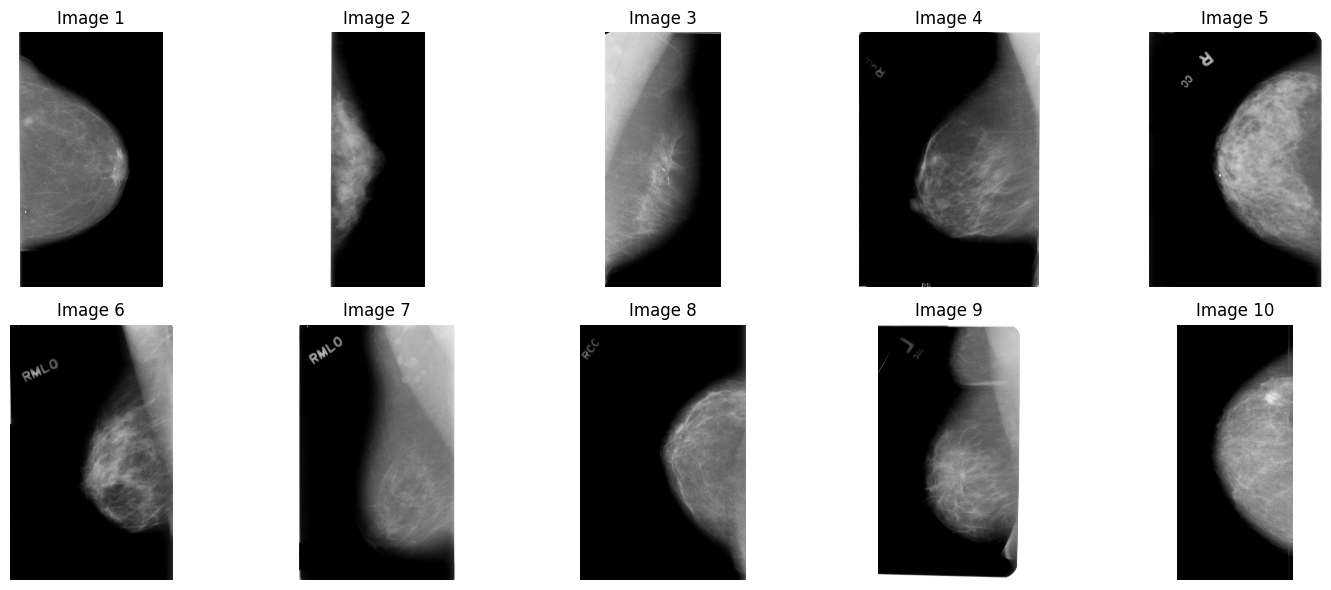

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns for 10 images

for i, file in enumerate(full_mammogram[0:10]):
    img = Image.open(file).convert("L")
    row, col = divmod(i, 5)
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()

In [13]:
ROI_mask = dicom[dicom.SeriesDescription == 'ROI mask images'].image_path
ROI_mask.head()

,image_path
5,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...


In [14]:
ROI_mask = ROI_mask.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask.head()

,image_path
5,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
8,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
9,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
14,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
20,/kaggle/input/cbis-ddsm-breast-cancer-image-da...


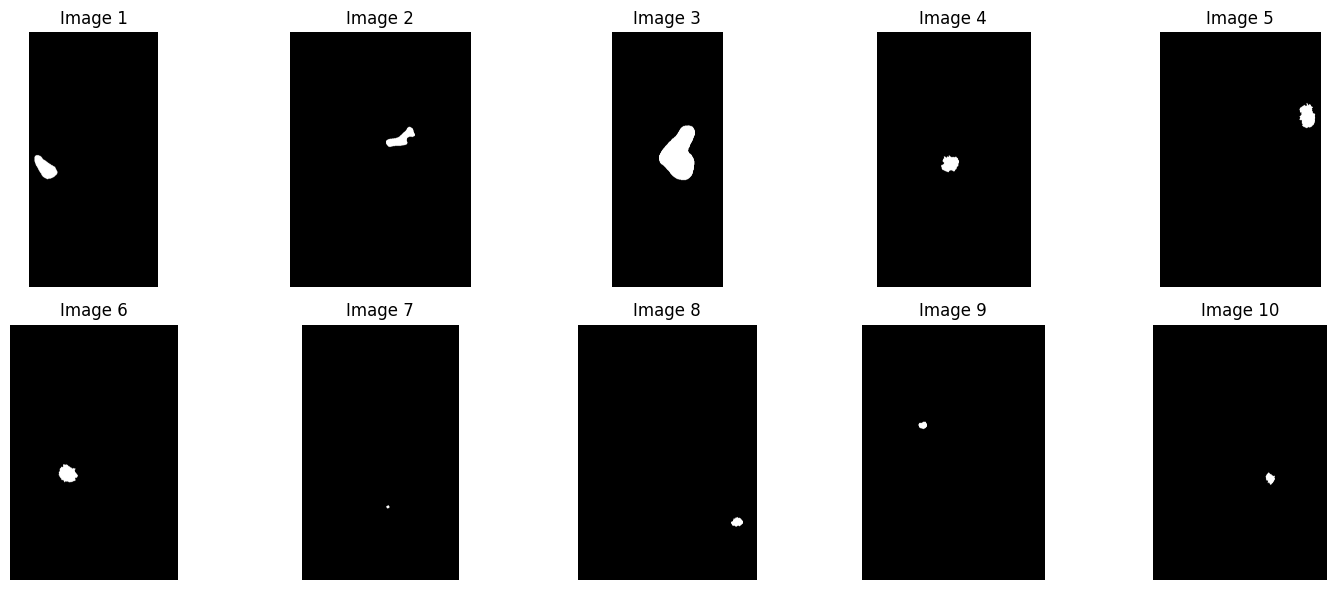

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns for 10 images

for i, file in enumerate(ROI_mask[0:10]):
    img = Image.open(file).convert("L")
    row, col = divmod(i, 5)
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()

In [16]:
calc_case = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')

In [17]:
calc_case.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [18]:
mass_case = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')

In [19]:
mass_case.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


# Some Insights

In [20]:
image_counts = pd.DataFrame(dicom['SeriesDescription'].value_counts())
image_counts = image_counts.reset_index()
image_counts = image_counts.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})

In [21]:
image_counts

,SeriesDescription_counts,count
0,cropped images,3567
1,ROI mask images,3247
2,full mammogram images,2857


**In this dataset: There are three types of images; cropped images , ROI images , Full mammogram images. <br>
From previous data frame; cropped images are the most used type.**

In [22]:
Part_Examined = pd.DataFrame(dicom['BodyPartExamined'].value_counts())
Part_Examined = Part_Examined.reset_index()
Part_Examined = Part_Examined.rename(columns={'BodyPartExamined':'BodyPartExamined_counts', 'index':'Breast part Examined'})

In [23]:
Part_Examined

,BodyPartExamined_counts,count
0,BREAST,9671
1,Left Breast,318
2,Right Breast,248


In [24]:
Type = pd.DataFrame({
    'abnormality': [calc_case['abnormality type'][0], mass_case['abnormality type'][0]],
    'counts': [len(calc_case), len(mass_case)]
})
Type

,abnormality,counts
0,calcification,1546
1,mass,1318


In [25]:
TChart =px.bar(data_frame= Type, x = 'abnormality', y='counts', color = 'abnormality')
TChart.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
TChart.show()

**The previous chart shows that Mass Case is the majority**
<br> <br>
**Note That: classification is cases where the examined tumor has some sort of description (medical wise), mass is cases where the tumor has another types of discreption, this is regardless the pathology of the tumor (Benign or Malignant)**

# Train & Test Data

In [26]:
x_train = mass_case["cropped image file path"]
y_train = mass_case["pathology"]

In [27]:
x_train = x_train.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
#x_train = x_train.apply(lambda x: x.replace('.dcm', ".jpg"))

In [28]:
train_images = x_train.tolist()
train_labels = y_train.tolist()

In [52]:
train_images = x_train.tolist()
train_labels = y_train.tolist()

img_width, img_height = 30, 30
X = []
y = []

for img_path, label in zip(train_images, train_labels):
    full_img_path = os.path.join(image_dir, img_path)

    if os.path.exists(full_img_path):
        img = load_img(full_img_path, target_size=(img_width, img_height), color_mode='grayscale')
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(label)
    else:
        print(f"Warning: Image file not found: {full_img_path}")

In [53]:
model = models.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', input_shape=(30, 1, 1)),
    layers.MaxPooling2D((2, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [54]:
train_images = x_train.tolist()
train_labels = y_train.tolist()

In [55]:
img_width, img_height = 30, 30  # Adjust according to your image size
X = []
y = []

In [56]:
for img_path, label in zip(train_images, train_labels):
    full_img_path = os.path.join(image_dir, img_path)

    if os.path.exists(full_img_path):
        img = load_img(full_img_path, target_size=(img_width, img_height), color_mode='grayscale')
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(label)
    else:
        print(f"Warning: Image file not found: {full_img_path}")


In [57]:
    if os.path.exists(full_img_path):
        img = load_img(full_img_path, target_size=(img_width, img_height), color_mode='grayscale')
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(label)
    else:
        print(f"Warning: Image file not found: {full_img_path}")

In [63]:
if not X:
    print("No images were loaded. Check your image paths and directory structure.")
    # Print some example file paths for debugging
    print("Example file paths:", train_images[:5])
    # Print the image directory for debugging
    print("Image directory:", image_dir)
else:
    X = np.array(X)
    y = np.array(y)
#normlize
    X = X / 255.0
    y = np.array([1 if label == 'MALIGNANT' else 0 for label in y])

No images were loaded. Check your image paths and directory structure.
Example file paths: ['Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.dcm', 'Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.dcm', 'Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.dcm', 'Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000000.dcm', 'Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000000.dcm']
Image directory: /kaggle/

In [66]:
import shap

train_images = x_train.tolist()
train_labels = y_train.tolist()


img_width, img_height = 30, 30
X = []
y = []

for img_path, label in zip(train_images, train_labels):

    full_img_path = os.path.join(image_dir, img_path)

    if os.path.exists(full_img_path):
        img = load_img(full_img_path, target_size=(img_width, img_height), color_mode='grayscale')
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(label)
    else:
        print(f"Warning: Image file not found: {full_img_path}")

if not X:
    print("No images were loaded. Check your image paths and directory structure.")

    print("Example file paths:", train_images[:5])

    print("Image directory:", image_dir)
else:
    X = np.array(X)
    y = np.array(y)

    X = X / 255.0

    y = np.array([1 if label == 'MALIGNANT' else 0 for label in y])

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_cnn = X_train.reshape(-1, img_width, img_height, 1)
    X_val_cnn = X_val.reshape(-1, img_width, img_height, 1)

    history = model.fit(X_train_cnn, y_train, epochs=20, batch_size=32,
                        validation_data=(X_val_cnn, y_val),
                        callbacks=[EarlyStopping(patience=5)])

    loss, acc = model.evaluate(X_val_cnn, y_val)
    print("Validation Accuracy:", acc)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    explainer = shap.DeepExplainer(model, X_train_cnn[:100])
    shap_values = explainer.shap_values(X_val_cnn[:10])

    shap.image_plot(shap_values, -X_val_cnn[:10])

No images were loaded. Check your image paths and directory structure.
Example file paths: ['Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.dcm', 'Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.dcm', 'Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.dcm', 'Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000000.dcm', 'Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000000.dcm']
Image directory: /kaggle/